In [13]:
!jupyter nbconvert --to script 'review_decisions.ipynb'

[NbConvertApp] Converting notebook review_decisions.ipynb to script
[NbConvertApp] Writing 4001 bytes to review_decisions.py


In [1]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import glob


In [2]:

#df = pd.read_parquet('[Finished]claude_3_haiku_all_103554_articles.parquet')
#df = pd.read_parquet('intermediate_results_10370.parquet')
df = pd.read_parquet('Gemini_1.5_flash_prompt_v210350.parquet')
# df_groq = pd.read_parquet('pt3_groq_intermediate_results_3000.parquet')
# 
# 
# df_1_groq = pd.read_parquet('pt2_groq_intermediate_results_2000.parquet')
# df_2_groq = pd.read_parquet('groq_pt1_intermediate_results.parquet')
# df_3_groq = pd.read_parquet('pt4_groq_intermediate_results_2800.parquet')
# df_4_groq = pd.read_parquet('pt5_groq_intermediate_results_1550.parquet')
#df_1 = pd.read_parquet('claude_3_haiku_v2_pt35650.parquet')
# df_2 = pd.read_parquet('claude_3_haiku_v2_progress.parquet')
#df_3 = pd.read_parquet('claude_3_haiku_v2_pt3_2024.parquet')

In [3]:
df['Tokens_Used'].sum()

7951268

In [4]:
df_combined = pd.concat([df_groq, df_1_groq, df_2_groq, df_3_groq ,df_4_groq],join='outer')

NameError: name 'df_groq' is not defined

In [6]:
df.to_csv('Gemini_1.5_flash_v2_prompt_v2_ALL.csv')

In [18]:
df_combined = df_combined.drop_duplicates()

In [19]:
df_combined

,Title,Authors,Abstract,Published Year,Published Month,Journal,Volume,Issue,Pages,Accession Number,DOI,Ref,Covidence #,Study,Notes,Tags,AI_Decision,Tokens_Used
2000,Ex situ treatment of N-nitrosodimethylamine (N...,"Webster, Todd S; Condee, Charles; Hatzinger, P...",N-nitrosodimethylamine (NDMA) is a suspected h...,2013.0,/,Water research,47,2,811-20,None,https://dx.doi.org/10.1016/j.watres.2012.11.011,23206498,#2401,Webster 2013,None,None,This article does not meet the inclusion crite...,509
2001,Modelling of biological Cr(VI) removal in draw...,"Tekerlekopoulou, Athanasia G; Tsiflikiotou, Ma...",The kinetics of hexavalent chromium bio-reduct...,2013.0,/,Water research,47,2,623-36,None,https://dx.doi.org/10.1016/j.watres.2012.10.034,23182668,#2402,Tekerlekopoulou 2013,None,None,This article does not meet the inclusion crite...,563
2002,The effect of vertical and horizontal symmetry...,"Cattaneo, Zaira; Vecchi, Tomaso; Fantino, Mica...",Visual stimuli that exhibit vertical symmetry ...,2013.0,/,"Attention, perception & psychophysics",75,2,375-82,None,https://dx.doi.org/10.3758/s13414-012-0393-x,23150215,#2403,Cattaneo 2013,None,None,This article does not meet the inclusion crite...,520
2003,Designing simulator tools for rail research: t...,"Naweed, A; Hockey, G R J; Clarke, S D",The microworld simulator paradigm is well esta...,2013.0,/,Applied ergonomics,44,3,445-54,None,https://dx.doi.org/10.1016/j.apergo.2012.10.005,23107003,#2405,Naweed 2013,None,None,This article does not meet the inclusion crite...,485
2004,Conformal polymer coatings for pancreatic isle...,"Blasi, Paolo; Luca, Giovanni; Mancuso, Frances...",The aim of this work was to improve an aqueous...,2013.0,/,International journal of pharmaceutics,440,2,141-7,None,https://dx.doi.org/10.1016/j.ijpharm.2012.10.010,23078858,#2407,Blasi 2013,None,None,This article does not meet the inclusion crite...,468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3146,Altered biochemical markers of bone turnover i...,"Inoue, M; Tanaka, H; Moriwake, T; Oka, M; Seki...",Microgravity induces significant and progressi...,2000.0,/,Bone,26,3,281-6,None,None,10710002,#3794,Inoue 2000,None,None,Error: Error code: 429 - {'error': {'message':...,0
3148,Regulation of heat shock protein message in Ju...,"Lewis, M L; Hughes-Fulford, M",Although our understanding of effects of space...,2000.0,/,Journal of cellular biochemistry,77,1,127-34,None,None,10679823,#3796,Lewis 2000,None,None,Error: Error code: 429 - {'error': {'message':...,0
3149,Telemetry as a new concept in long term monito...,"Aly, A F; Afchine, D; Esser, P; Joos, M; Niewe...",Sudden Infant Death Syndrome (SIDS) is the mos...,2000.0,/,European journal of medical research,5,1,19-22,None,None,10657284,#3797,Aly 2000,None,None,This article does not meet the inclusion crite...,408
3150,Continuous assessment of intraocular pressure ...,"Draeger, J; Michelson, G; Rumberger, E","Fluid shift after entering into microgravity, ...",2000.0,/,European journal of medical research,5,1,2-4,None,None,10657280,#3798,Draeger 2000,None,None,Error: Error code: 429 - {'error': {'message':...,0


In [20]:
df_good = df_combined[~df_combined["AI_Decision"].str.contains("Error")]

In [21]:
df_good

,Title,Authors,Abstract,Published Year,Published Month,Journal,Volume,Issue,Pages,Accession Number,DOI,Ref,Covidence #,Study,Notes,Tags,AI_Decision,Tokens_Used
2000,Ex situ treatment of N-nitrosodimethylamine (N...,"Webster, Todd S; Condee, Charles; Hatzinger, P...",N-nitrosodimethylamine (NDMA) is a suspected h...,2013.0,/,Water research,47,2,811-20,None,https://dx.doi.org/10.1016/j.watres.2012.11.011,23206498,#2401,Webster 2013,None,None,This article does not meet the inclusion crite...,509
2001,Modelling of biological Cr(VI) removal in draw...,"Tekerlekopoulou, Athanasia G; Tsiflikiotou, Ma...",The kinetics of hexavalent chromium bio-reduct...,2013.0,/,Water research,47,2,623-36,None,https://dx.doi.org/10.1016/j.watres.2012.10.034,23182668,#2402,Tekerlekopoulou 2013,None,None,This article does not meet the inclusion crite...,563
2002,The effect of vertical and horizontal symmetry...,"Cattaneo, Zaira; Vecchi, Tomaso; Fantino, Mica...",Visual stimuli that exhibit vertical symmetry ...,2013.0,/,"Attention, perception & psychophysics",75,2,375-82,None,https://dx.doi.org/10.3758/s13414-012-0393-x,23150215,#2403,Cattaneo 2013,None,None,This article does not meet the inclusion crite...,520
2003,Designing simulator tools for rail research: t...,"Naweed, A; Hockey, G R J; Clarke, S D",The microworld simulator paradigm is well esta...,2013.0,/,Applied ergonomics,44,3,445-54,None,https://dx.doi.org/10.1016/j.apergo.2012.10.005,23107003,#2405,Naweed 2013,None,None,This article does not meet the inclusion crite...,485
2004,Conformal polymer coatings for pancreatic isle...,"Blasi, Paolo; Luca, Giovanni; Mancuso, Frances...",The aim of this work was to improve an aqueous...,2013.0,/,International journal of pharmaceutics,440,2,141-7,None,https://dx.doi.org/10.1016/j.ijpharm.2012.10.010,23078858,#2407,Blasi 2013,None,None,This article does not meet the inclusion crite...,468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126,Immunolocalization of actin in root statocytes...,"Driss-Ecole, D; Vassy, J; Rembur, J; Guivarc'h...",Lentil root statocytes show a strict structura...,2000.0,/,Journal of experimental botany,51,344,521-8,None,None,10938808,#3770,Driss-Ecole 2000,None,None,This article does not meet the inclusion crite...,448
3127,Intratumoral injection with [(188)Re]rhenium s...,"Junfeng, Y; Ruping, Z; Xinlan, D; Xiaofeng, M;...",Hepatocellular carcinoma (HCC) is one of the m...,2000.0,/,Nuclear medicine and biology,27,4,347-52,None,None,10938468,#3771,Junfeng 2000,None,None,This article primarily focuses on the developm...,494
3140,Induction and repair of DNA double-strand brea...,"Pross, H D; Casares, A; Kiefer, J",The influence of microgravity on induction and...,2000.0,/,Radiation research,153,5 Pt 1,521-5,None,None,10790272,#3787,Pross 2000,None,None,The article appears to be relevant to spacefli...,382
3141,Model for radial dependence of frequency distr...,"Cucinotta, F A; Nikjoo, H; Goodhead, D T",This paper develops a deterministic model of f...,2000.0,/,Radiation research,153,4,459-68,None,None,10761008,#3788,Cucinotta 2000,None,None,The article does not provide sufficient inform...,323


In [115]:
df_good.to_parquet('claude_3_haiku_all_103554_articles.parquet')

In [22]:

df_total =  pd.read_csv('all_abstracts_screen.csv')

In [23]:
df_total

,Title,Authors,Abstract,Published Year,Published Month,Journal,Volume,Issue,Pages,Accession Number,DOI,Ref,Covidence #,Study,Notes,Tags
0,Ozone spectroscopy in the terahertz range from...,"Tyuterev, V G; Barbe, A; Manceron, L; Grouiez,...",Ozone is one of the important molecules in ter...,2023.0,/,"Spectrochimica acta. Part A, Molecular and bio...",305,"cuo, 9602533",123456,NaN,https://dx.doi.org/10.1016/j.saa.2023.123456,37897864,#1,Tyuterev 2023,NaN,NaN
1,The Space Environment Activates Capsular Polys...,"Sun, Yue; Guo, Shuai; Yang, Jingfang; Li, Ying...",The study of microorganisms in outer space has...,2023.0,/,Microbiology spectrum,NaN,101634614,e0467722,NaN,https://dx.doi.org/10.1128/spectrum.04677-22,36861974,#3,Sun 2023,NaN,NaN
2,Characterizing Biofilm Interactions between Ra...,"Foote, Andrea; Schutz, Kristin; Zhao, Zirui; D...",Ralstonia insidiosa and Chryseobacterium gleum...,2023.0,/,Microbiology spectrum,NaN,101634614,e0410522,NaN,https://dx.doi.org/10.1128/spectrum.04105-22,36744887,#4,Foote 2023,NaN,NaN
3,Long-term spaceflight composite stress induces...,"Yin, Yi-Shu; Zhu, Yuan-Bing; Liu, Jun-Lian; Fa...",INTRODUCTION: Long-term spaceflight composite ...,2023.0,/,CNS neuroscience & therapeutics,NaN,101473265,NaN,NaN,https://dx.doi.org/10.1111/cns.14438,37849237,#5,Yin 2023,NaN,NaN
4,Measuring and Energizing Sensor System for Dig...,"Garcia-Fernandez, Jose Pablo; Hernandez-Gonzal...",Space technology for small satellites has made...,2023.0,/,"Sensors (Basel, Switzerland)",23,19,NaN,NaN,https://dx.doi.org/10.3390/s23198299,37837128,#6,Garcia-Fernandez 2023,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10369,Effects of 2-G exposure on temperature regulat...,"Fuller, PM; Warden, CH; Barry, SJ; Fuller, CA",Altered ambient force environments affect ener...,2000.0,NaN,JOURNAL OF APPLIED PHYSIOLOGY,89,4,1491-1498,WOS:000089755800032,10.1152/jappl.2000.89.4.1491,NaN,#17793,Fuller 2000,NaN,Animal; Endocrine; Sleep Medicine
10370,Ciliary neurotrophic factor prevents unweighti...,"Fraysse, B; Guillet, C; Huchet-Candiou, C; Cam...",The purpose of the present work was to see whe...,2000.0,NaN,JOURNAL OF APPLIED PHYSIOLOGY,88,5,1623-1630,WOS:000086985000018,10.1152/jappl.2000.88.5.1623,NaN,#17794,Fraysse 2000,NaN,NaN
10371,Tilt training:: A treatment for malignant and ...,"Reybrouck, T; Heidbüchel, H; Van de Werf, F; E...",The treatment of neurocardiogenic syncope is i...,2000.0,NaN,PACE-PACING AND CLINICAL ELECTROPHYSIOLOGY,23,4,493-498,WOS:000086541500015,10.1111/j.1540-8159.2000.tb00833.x,NaN,#17795,Reybrouck 2000,NaN,NaN
10372,A rational design of bioactive taxanes with si...,"Wu, JH; Zamir, LO",The structure of alpha beta-tubulin was refine...,2000.0,NaN,ANTI-CANCER DRUG DESIGN,15,1,73-78,WOS:000088370400008,NaN,NaN,#17796,Wu 2000,NaN,NaN


In [24]:
df_pending = df_total[~df_total['Title'].isin(df_good['Title'])]

In [25]:
df_pending.shape

(7814, 16)

In [26]:
df_pending.to_parquet('groq_pending_abstracts_9_17_24_v2.parquet')

In [79]:
df_pending.to_parquet('claude_3_haiku_v3_pending_abstracts_pt4.parquet')

In [8]:
df_error = df[df['AI_Decision'].str.contains('Error')]

In [10]:
df_error.to_parquet('pending_abstracts.parquet')

In [2]:
df_cleaned = df.unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [9]:
df = pd.read_parquet('intermediate_results_10.parquet')

In [26]:
df

,Title,Authors,Abstract,Published Year,Published Month,Journal,Volume,Issue,Pages,Accession Number,DOI,Ref,Covidence #,Study,Notes,Tags,AI_Decision,Tokens_Used,justification,decision
0,Ozone spectroscopy in the terahertz range from...,"Tyuterev, V G; Barbe, A; Manceron, L; Grouiez,...",Ozone is one of the important molecules in ter...,2023.0,/,"Spectrochimica acta. Part A, Molecular and bio...",305,"cuo, 9602533",123456,None,https://dx.doi.org/10.1016/j.saa.2023.123456,37897864,#1,Tyuterev 2023,None,None,<justification>\nThis article focuses on ozone...,629,,
1,The Space Environment Activates Capsular Polys...,"Sun, Yue; Guo, Shuai; Yang, Jingfang; Li, Ying...",The study of microorganisms in outer space has...,2023.0,/,Microbiology spectrum,None,101634614,e0467722,None,https://dx.doi.org/10.1128/spectrum.04677-22,36861974,#3,Sun 2023,None,None,<justification>\nThis article focuses on the e...,574,,
2,Characterizing Biofilm Interactions between Ra...,"Foote, Andrea; Schutz, Kristin; Zhao, Zirui; D...",Ralstonia insidiosa and Chryseobacterium gleum...,2023.0,/,Microbiology spectrum,None,101634614,e0410522,None,https://dx.doi.org/10.1128/spectrum.04105-22,36744887,#4,Foote 2023,None,None,<justification>\nThis article focuses on the i...,547,,
3,Long-term spaceflight composite stress induces...,"Yin, Yi-Shu; Zhu, Yuan-Bing; Liu, Jun-Lian; Fa...",INTRODUCTION: Long-term spaceflight composite ...,2023.0,/,CNS neuroscience & therapeutics,None,101473265,None,None,https://dx.doi.org/10.1111/cns.14438,37849237,#5,Yin 2023,None,None,<justification>\nThis article focuses on the e...,513,,
4,Measuring and Energizing Sensor System for Dig...,"Garcia-Fernandez, Jose Pablo; Hernandez-Gonzal...",Space technology for small satellites has made...,2023.0,/,"Sensors (Basel, Switzerland)",23,19,None,None,https://dx.doi.org/10.3390/s23198299,37837128,#6,Garcia-Fernandez 2023,None,None,<justification>\nThis article focuses on the d...,547,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10345,Habitat fragmentation alters the properties of...,"Bordes, Frederic; Morand, Serge; Pilosof, Shai...",While the effects of deforestation and habitat...,2015.0,None,JOURNAL OF ANIMAL ECOLOGY,84,5,1253-1263,WOS:000360093400012,10.1111/1365-2656.12368,None,#17755,Bordes 2015,None,None,<justification>\nThis article focuses on the e...,471,,
10346,Using Satellite Tracking and Isotopic Informat...,"Sepulveda, Maritza; Newsome, Seth D.; Pavez, G...",Apex marine predators alter their foraging beh...,2015.0,None,PLOS ONE,10,8,None,WOS:000360069400042,10.1371/journal.pone.0134926,None,#17756,Sepulveda 2015,None,None,<justification>\nThis article focuses on the f...,563,,
10347,"Activity, abundance and expression of Ca<SUP>2...","Reilly, Beau D.; Cramp, Rebecca L.; Franklin, ...","In most mammals, prolonged muscle disuse (e.g....",2015.0,None,JOURNAL OF COMPARATIVE PHYSIOLOGY B-BIOCHEMICA...,185,2,243-255,WOS:000347829000006,10.1007/s00360-014-0880-6,None,#17757,Reilly 2015,None,None,<justification>\nThis article focuses on the s...,536,,
10348,Evidence for the role of connexin 43-mediated ...,"Lloyd, Shane A.; Loiselle, Alayna E.; Zhang, Y...",Background: Connexin 43 (Cx43) is the predomin...,2014.0,None,BMC MUSCULOSKELETAL DISORDERS,15,None,None,WOS:000335188400001,10.1186/1471-2474-15-122,None,#17759,Lloyd 2014,None,Animal; MSK,<justification>\nThis article focuses on anima...,650,,


In [7]:
#For CLAUDE
def parse_textblock(df):
    def extract_content(text):
        # Extract the content inside TextBlock
        match = re.search(r'TextBlock\(text=[\'"](.*?)[\'"]', text, re.DOTALL)
        if match:
            content = match.group(1)
            # Use BeautifulSoup to parse the content
            soup = BeautifulSoup(content, 'html.parser')
            justification = soup.find('justification')
            decision = soup.find('decision')

            return (justification.text.strip() if justification else "",
                    decision.text.strip() if decision else "")
        return "", ""

    # Apply the extraction function to the AI_Decision column
    df[['justification', 'decision']] = df['AI_Decision'].apply(extract_content).apply(pd.Series)

    return df

In [14]:
#For GEMINI
import pandas as pd
from bs4 import BeautifulSoup

def parse_ai_decisions(df):
    decisions = []
    justifications = []
    tags = []

    for decision_text in df['AI_Decision']:
        soup = BeautifulSoup(decision_text, 'html.parser')

        justification_tag = soup.find('justification')
        decision_tag = soup.find('decision')
        tag_tag = soup.find('tags')

        justification = justification_tag.get_text(strip=True) if justification_tag else ''
        decision = decision_tag.get_text(strip=True) if decision_tag else ''
        tag = tag_tag.get_text(strip=True) if tag_tag else ''

        justifications.append(justification)
        decisions.append(decision)
        tags.append(tag)

    df['Justification'] = justifications
    df['Decision'] = decisions
    df['Tag'] = tags

    return df

# Example usage:
df = parse_ai_decisions(df)
print(df[['Decision', 'Justification']])

                                Decision  \
0           1. Exclude and do not review   
1           1. Exclude and do not review   
2      2. Exclude, review for discussion   
3           1. Exclude and do not review   
4           1. Exclude and do not review   
...                                  ...   
10345       1. Exclude and do not review   
10346       1. Exclude and do not review   
10347       1. Exclude and do not review   
10348       1. Exclude and do not review   
10349       1. Exclude and do not review   

                                           Justification  
0      This article focuses on ozone spectroscopy in ...  
1      This article focuses on the effects of space e...  
2      This article focuses on the interaction betwee...  
3      This article focuses on the effects of long-te...  
4      This article focuses on the development of a C...  
...                                                  ...  
10345  This article focuses on the impact of habitat ...  

In [16]:
df['Tag'].value_counts()

Tag
N/A                                                                              2599
None                                                                             1490
                                                                                  133
Radiation                                                                          13
Microbiology, Infection Risk, Space Environment                                    11
                                                                                 ... 
Microgravity, Immune System, Natural Killer Cells, In Vitro                         1
Spaceflight, Microbiology, Infection, Sepsis, Elizabethkingia miricola              1
Radiation, Fungi, Space Station, Adaptation                                         1
Prion disease, Amyloid fibrils                                                      1
Muscle Atrophy, Mechanical Unloading, nNOSμ, Oxidative Stress, Animal Studies       1
Name: count, Length: 5930, dtype: int64

<Axes: >

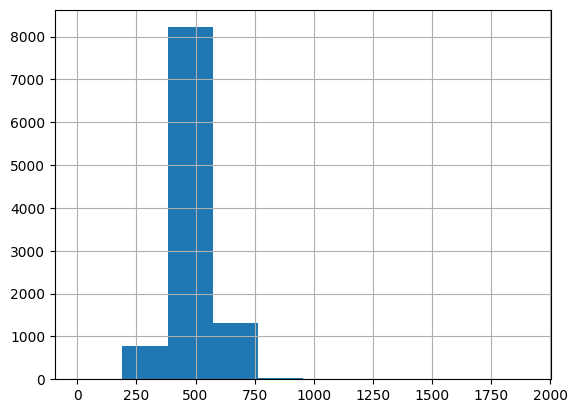

In [33]:
df['Tokens_Used'].hist()

In [34]:
df['Tokens_Used'].sum()

5081488

In [31]:
df.to_excel('gemini_decisions_v1.xlsx')